## CUSTOMER SEGMENTATION

*INTRODUCTION:*

Customer Personality Analysis is all about getting to know a company’s ideal customers on a deeper level. By understanding who they are, what they like, and how they behave, businesses can better tailor their products to fit the unique needs of different customer groups.

In this project, we dive into this analysis, helping businesses see beyond the numbers. With these insights, companies can adjust their products and marketing strategies to better connect with specific customer segments. For example, instead of trying to sell a new product to everyone, the company can focus on the group most likely to love it, making their efforts more targeted and effective.

In [3]:
#%pip install -U yellowbrick
#%pip install -U prince --user
#%pip install -U scikit-learn
#%pip install -U seaborn 

In [4]:
# importing libraries 

import numpy as np
import pandas as pd
from scipy import stats
import datetime

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import ListedColormap
import seaborn as sns
%matplotlib inline
palette = sns.color_palette("Spectral", n_colors=5) 
sns.set_theme(context='notebook', palette=palette, style='darkgrid')

import sklearn
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

pd.set_option("display.max_columns",None)

import warnings
warnings.filterwarnings("ignore")

import yellowbrick
from yellowbrick.cluster import KElbowVisualizer
from mpl_toolkits.mplot3d import Axes3D
np.random.seed(42)

### LOADING DATA

In [6]:
df = pd.read_csv('marketing.csv', sep='\t')

In [7]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [9]:
df.describe().T

count          mean           std     min       25%  \
ID                   2240.0   5592.159821   3246.662198     0.0   2828.25   
Year_Birth           2240.0   1968.805804     11.984069  1893.0   1959.00   
Income               2216.0  52247.251354  25173.076661  1730.0  35303.00   
Kidhome              2240.0      0.444196      0.538398     0.0      0.00   
Teenhome             2240.0      0.506250      0.544538     0.0      0.00   
Recency              2240.0     49.109375     28.962453     0.0     24.00   
MntWines             2240.0    303.935714    336.597393     0.0     23.75   
MntFruits            2240.0     26.302232     39.773434     0.0      1.00   
MntMeatProducts      2240.0    166.950000    225.715373     0.0     16.00   
MntFishProducts      2240.0     37.525446     54.628979     0.0      3.00   
MntSweetProducts     2240.0     27.062946     41.280498     0.0      1.00   
MntGoldProds         2240.0     44.021875     52.167439     0.0      9.00   
NumDealsPurchases    2240.0      2.325000      1.932238     0.0      1.00   
NumWebPurchases      2240.0      4.084821      2.778714     0.0      2.00   
NumCatalogPurchases  2240.0      2.662054      2.923101     0.0      0.00   
NumStorePurchases    2240.0      5.790179      3.250958     0.0      3.00   
NumWebVisitsMonth    2240.0      5.316518      2.426645     0.0      3.00   
AcceptedCmp3         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp4         2240.0      0.074554      0.262728     0.0      0.00   
AcceptedCmp5         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp1         2240.0      0.064286      0.245316     0.0      0.00   
AcceptedCmp2         2240.0      0.013393      0.114976     0.0      0.00   
Complain             2240.0      0.009375      0.096391     0.0      0.00   
Z_CostContact        2240.0      3.000000      0.000000     3.0      3.00   
Z_Revenue            2240.0     11.000000      0.000000    11.0     11.00   
Response             2240.0      0.149107      0.356274     0.0      0.00   

                         50%       75%       max  
ID                    5458.5   8427.75   11191.0  
Year_Birth            1970.0   1977.00    1996.0  
Income               51381.5  68522.00  666666.0  
Kidhome                  0.0      1.00       2.0  
Teenhome                 0.0      1.00       2.0  
Recency                 49.0     74.00      99.0  
MntWines               173.5    504.25    1493.0  
MntFruits                8.0     33.00     199.0  
MntMeatProducts         67.0    232.00    1725.0  
MntFishProducts         12.0     50.00     259.0  
MntSweetProducts         8.0     33.00     263.0  
MntGoldProds            24.0     56.00     362.0  
NumDealsPurchases        2.0      3.00      15.0  
NumWebPurchases          4.0      6.00      27.0  
NumCatalogPurchases      2.0      4.00      28.0  
NumStorePurchases        5.0      8.00      13.0  
NumWebVisitsMonth        6.0      7.00      20.0  
AcceptedCmp3             0.0      0.00       1.0  
AcceptedCmp4             0.0      0.00       1.0  
AcceptedCmp5             0.0      0.00       1.0  
AcceptedCmp1             0.0      0.00       1.0  
AcceptedCmp2             0.0      0.00       1.0  
Complain                 0.0      0.00       1.0  
Z_CostContact            3.0      3.00       3.0  
Z_Revenue               11.0     11.00      11.0  
Response                 0.0      0.00       1.0

In [10]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.shape

(2240, 29)

*Initial data exploration reveals:*

- The dataset consists of 2240 observation across 29 columns
- There are 24 missing values in the 'income' column
- Most columns are numerical, the categorical are 'marital_status', 'education' and 'Dt_customer'
- Outliers are present in some numerical columns
- There are no duplicates.

### DATA CLEANING AND FEATURE ADJUSTING

In [15]:
print("Number of unique values in Z_CostContact column:", df['Z_CostContact'].nunique())
print("Number of unique values in Z_Revenue column:", df["Z_Revenue"].nunique())

Number of unique values in Z_CostContact column: 1
Number of unique values in Z_Revenue column: 1


In [16]:
# Remove unnecessary columns ('Id' and columns with 1 unique value)
df.drop(['ID', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

In [17]:
# Calculate the number of days each customer has been with the company 

df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer, format="%d-%m-%Y")
latest_date = df['Dt_Customer'].max()

df['Days_is_client'] = (latest_date - df['Dt_Customer']).dt.days

df.head()

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0        1957  Graduation         Single  58138.0        0         0   
1        1954  Graduation         Single  46344.0        1         1   
2        1965  Graduation       Together  71613.0        0         0   
3        1984  Graduation       Together  26646.0        1         0   
4        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0             0             0             0             0         0         1   
1             0             0             0             0         0         0   
2             0             0             0             0         0         0   
3             0             0             0             0         0         0   
4             0             0             0             0         0         0   

   Days_is_client  
0             663  
1             113  
2             312  
3             139  
4             161

In [18]:
# Count values in categorical columns
categorical_columns = df.select_dtypes('object')

for column in categorical_columns:
    value_counts = df[column].value_counts()
    print(value_counts)
    print("\n")

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64


Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64




In [19]:
# Standardize 'Marital_Status' into 2 broader groups
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'], 'Partner')

df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'], 'Single')

# Standardize 'Education' into 3 broader groups
df['Education'] = df['Education'].replace(['PhD', 'Master'], 'Postgraduate')  

df['Education'] = df['Education'].replace(['2n Cycle', 'Graduation'], 'Graduate')

df['Education'] = df['Education'].replace(['Basic'], 'Undergraduate')

for column in categorical_columns:
    print(f"Unique values in {column}:")
    print(df[column].unique())
    print("\n")

Unique values in Education:
['Graduate' 'Postgraduate' 'Undergraduate']


Unique values in Marital_Status:
['Single' 'Partner']




In [20]:
df_2=df.copy()

In [21]:
#df_2 cominations
df_2['Kids'] = df_2['Kidhome'] + df_2['Teenhome']
df_2['TotalAcceptedCmp'] = df_2['AcceptedCmp1'] + df_2['AcceptedCmp2'] + df_2['AcceptedCmp3'] + df_2['AcceptedCmp4'] + df_2['AcceptedCmp5']
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2240 non-null   int64         
 1   Education            2240 non-null   object        
 2   Marital_Status       2240 non-null   object        
 3   Income               2216 non-null   float64       
 4   Kidhome              2240 non-null   int64         
 5   Teenhome             2240 non-null   int64         
 6   Dt_Customer          2240 non-null   datetime64[ns]
 7   Recency              2240 non-null   int64         
 8   MntWines             2240 non-null   int64         
 9   MntFruits            2240 non-null   int64         
 10  MntMeatProducts      2240 non-null   int64         
 11  MntFishProducts      2240 non-null   int64         
 12  MntSweetProducts     2240 non-null   int64         
 13  MntGoldProds         2240 non-nul

In [22]:
# Combining columns together to reduce the number of dimensions

df['Kids'] = df['Kidhome'] + df['Teenhome']

df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

df['TotalNumPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

In [23]:
 #df_2 selection of necessary columns

cols_to_drop = [0, 4, 5, 6, 7] + list(range(19, 24))
df_2 = df_2.drop(df_2.columns[cols_to_drop], axis=1)

df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   object 
 1   Marital_Status       2240 non-null   object 
 2   Income               2216 non-null   float64
 3   MntWines             2240 non-null   int64  
 4   MntFruits            2240 non-null   int64  
 5   MntMeatProducts      2240 non-null   int64  
 6   MntFishProducts      2240 non-null   int64  
 7   MntSweetProducts     2240 non-null   int64  
 8   MntGoldProds         2240 non-null   int64  
 9   NumDealsPurchases    2240 non-null   int64  
 10  NumWebPurchases      2240 non-null   int64  
 11  NumCatalogPurchases  2240 non-null   int64  
 12  NumStorePurchases    2240 non-null   int64  
 13  NumWebVisitsMonth    2240 non-null   int64  
 14  Complain             2240 non-null   int64  
 15  Response             2240 non-null   i

In [24]:
# Select only necessary columns

data = df.copy()

df = df[['Education', 'Marital_Status', 'Income', 'Kids', 'Days_is_client', 'Recency', 'Expenses', 
                 'TotalNumPurchases', 'TotalAcceptedCmp', 'Complain', 'Response']]

In [25]:
# Remove duplicate rows from the DataFrame
df.drop_duplicates(inplace=True)

# Remove rows with any missing values (NaN)
df.dropna(inplace=True)

df.shape

(2031, 11)

In [26]:
# Remove duplicate rows from the DataFrame_2
df_2.drop_duplicates(inplace=True)

# Remove rows with any missing values (NaN) _2
df_2.dropna(inplace=True)

df_2.shape

(2031, 19)

In [27]:
df_2.describe().T

count          mean           std     min      25%  \
Income               2031.0  52376.799606  25539.844351  1730.0  35533.5   
MntWines             2031.0    305.463319    337.444902     0.0     23.0   
MntFruits            2031.0     26.326440     39.792309     0.0      2.0   
MntMeatProducts      2031.0    167.970950    226.892930     0.0     16.0   
MntFishProducts      2031.0     37.491384     54.820889     0.0      3.0   
MntSweetProducts     2031.0     27.171837     41.516838     0.0      1.0   
MntGoldProds         2031.0     43.834072     51.774773     0.0      9.0   
NumDealsPurchases    2031.0      2.335795      1.934008     0.0      1.0   
NumWebPurchases      2031.0      4.099951      2.757231     0.0      2.0   
NumCatalogPurchases  2031.0      2.673560      2.939000     0.0      0.0   
NumStorePurchases    2031.0      5.784835      3.239912     0.0      3.0   
NumWebVisitsMonth    2031.0      5.321024      2.439685     0.0      3.0   
Complain             2031.0      0.009847      0.098768     0.0      0.0   
Response             2031.0      0.152634      0.359723     0.0      0.0   
Days_is_client       2031.0    352.557361    202.336791     0.0    178.0   
Kids                 2031.0      0.950763      0.745785     0.0      0.0   
TotalAcceptedCmp     2031.0      0.300837      0.679462     0.0      0.0   

                         50%      75%       max  
Income               51563.0  68557.0  666666.0  
MntWines               176.0    506.0    1493.0  
MntFruits                8.0     33.0     199.0  
MntMeatProducts         68.0    230.0    1725.0  
MntFishProducts         12.0     50.0     259.0  
MntSweetProducts         8.0     34.0     262.0  
MntGoldProds            24.0     56.0     321.0  
NumDealsPurchases        2.0      3.0      15.0  
NumWebPurchases          4.0      6.0      27.0  
NumCatalogPurchases      2.0      4.0      28.0  
NumStorePurchases        5.0      8.0      13.0  
NumWebVisitsMonth        6.0      7.0      20.0  
Complain                 0.0      0.0       1.0  
Response                 0.0      0.0       1.0  
Days_is_client         352.0    528.0     699.0  
Kids                     1.0      1.0       3.0  
TotalAcceptedCmp         0.0      0.0       4.0

In [28]:
df.describe().T

count          mean           std     min      25%  \
Income             2031.0  52376.799606  25539.844351  1730.0  35533.5   
Kids               2031.0      0.950763      0.745785     0.0      0.0   
Days_is_client     2031.0    352.557361    202.336791     0.0    178.0   
Recency            2031.0     48.891187     28.974466     0.0     24.0   
Expenses           2031.0    608.258001    603.747499     5.0     69.0   
TotalNumPurchases  2031.0     14.894141      7.658546     0.0      8.0   
TotalAcceptedCmp   2031.0      0.300837      0.679462     0.0      0.0   
Complain           2031.0      0.009847      0.098768     0.0      0.0   
Response           2031.0      0.152634      0.359723     0.0      0.0   

                       50%      75%       max  
Income             51563.0  68557.0  666666.0  
Kids                   1.0      1.0       3.0  
Days_is_client       352.0    528.0     699.0  
Recency               49.0     74.0      99.0  
Expenses             397.0   1048.5    2525.0  
TotalNumPurchases     15.0     21.0      44.0  
TotalAcceptedCmp       0.0      0.0       4.0  
Complain               0.0      0.0       1.0  
Response               0.0      0.0       1.0

In [29]:
# Categorize columns into three groups based on their data type

binary_columns = [col for col in df.columns if df[col].nunique() == 2]

categorical_columns = [col for col in df.columns if 2 < df[col].nunique() < 10]

numerical_columns = [col for col in df.select_dtypes(include=['number']).columns 
                     if col not in binary_columns + categorical_columns]

In [30]:
#Categorize columns into three groups based o their data type on df_2

binary_columns_2 = [col for col in df_2.columns if df_2[col].nunique() == 2]

categorical_columns_2 = [col for col in df_2.columns if 2 < df_2[col].nunique() < 10]

numerical_columns_2 = [col for col in df_2.select_dtypes(include=['number']).columns 
                     if col not in binary_columns + categorical_columns]

*Key points:*
- We created a new feature representing the number of days each client has been with the company
- Unnecessary features were dropped to streamline the dataset
- Standardization: 'Marital_Status' and 'Education' were standardized into fewer, broader categories
- Some columns were combined to reduce their overall quantity

### OUTLIERS

In [33]:
# Calculate the z-scores for each column
z_scores = pd.DataFrame(stats.zscore(df[numerical_columns]), columns=numerical_columns)

# Generate descriptive statistics for the z-scores
print("Descriptive Statistics for Z-Scores before Outliers Removal")
display(z_scores.describe().round(3))

Descriptive Statistics for Z-Scores before Outliers Removal


Income  Days_is_client   Recency  Expenses  TotalNumPurchases
count  2031.000        2031.000  2031.000  2031.000           2031.000
mean      0.000           0.000     0.000     0.000              0.000
std       1.000           1.000     1.000     1.000              1.000
min      -1.984          -1.743    -1.688    -0.999             -1.945
25%      -0.660          -0.863    -0.859    -0.893             -0.900
50%      -0.032          -0.003     0.004    -0.350              0.014
75%       0.634           0.867     0.867     0.729              0.797
max      24.058           1.713     1.730     3.176              3.801

In [34]:
# Calculate the z-scores for each column on df_2
z_scores_2 = pd.DataFrame(stats.zscore(df_2[numerical_columns_2]), columns=numerical_columns_2)

# Generate descriptive statistics for the z-scores
print("Descriptive Statistics for Z-Scores before Outliers Removal")
display(z_scores_2.describe().round(3))

Descriptive Statistics for Z-Scores before Outliers Removal


Income  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
count  2031.000  2031.000   2031.000         2031.000         2031.000   
mean      0.000    -0.000      0.000            0.000           -0.000   
std       1.000     1.000      1.000            1.000            1.000   
min      -1.984    -0.905     -0.662           -0.740           -0.684   
25%      -0.660    -0.837     -0.611           -0.670           -0.629   
50%      -0.032    -0.384     -0.461           -0.441           -0.465   
75%       0.634     0.594      0.168            0.273            0.228   
max      24.058     3.520      4.340            6.864            4.042   

       MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
count          2031.000      2031.000           2031.000         2031.000   
mean              0.000         0.000              0.000            0.000   
std               1.000         1.000              1.000            1.000   
min              -0.655        -0.847             -1.208           -1.487   
25%              -0.631        -0.673             -0.691           -0.762   
50%              -0.462        -0.383             -0.174           -0.036   
75%               0.165         0.235              0.344            0.689   
max               5.658         5.355              6.550            8.307   

       NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
count             2031.000           2031.000           2031.000   
mean                -0.000              0.000              0.000   
std                  1.000              1.000              1.000   
min                 -0.910             -1.786             -2.182   
25%                 -0.910             -0.860             -0.952   
50%                 -0.229             -0.242              0.278   
75%                  0.451              0.684              0.688   
max                  8.619              2.228              6.018   

       Days_is_client  
count        2031.000  
mean            0.000  
std             1.000  
min            -1.743  
25%            -0.863  
50%            -0.003  
75%             0.867  
max             1.713

Descriptive Statistics for Z-Scores before Outliers Removal

In [36]:
## Removing Outliers df_2

# Identify rows where any of the z-scores exceed the threshold
outliers_2 = z_scores_2[(np.abs(z_scores_2) > 3).any(axis=1)]

#Drop the rows containing outliers
df_2 = df_2.drop(outliers_2.index)

In [37]:
## Removing Outliers

# Identify rows where any of the z-scores exceed the threshold
outliers = z_scores[(np.abs(z_scores) > 3).any(axis=1)]

# Drop the rows containing outliers
df = df.drop(outliers.index)

Z-scores above 3 are considered outliers, which could skew our clustering results and should be removed. This is particularly crucial in the Income column, where the highest Z-score exceeds 24.

*What is Z score?*
 
     ‘Z score’ tells how many standard deviations away a data point is from the mean.

    The process of transforming a feature to its z-scores is called ‘Standardization’.

    The formula for Z-score is as follows:

    Zscore = (x - mean) / sd

    If the z score of a data point is more than 3, it indicates that the data point is quite different from the other data points. Such a data point can be an outlier.

    Z-score can be both positive and negative. The farther away from 0, higher the chance of a given data point being an outlier. Typically, Z-score greater than 3 is considered extreme.

### EXPLORATORY DATA ANALYSIS

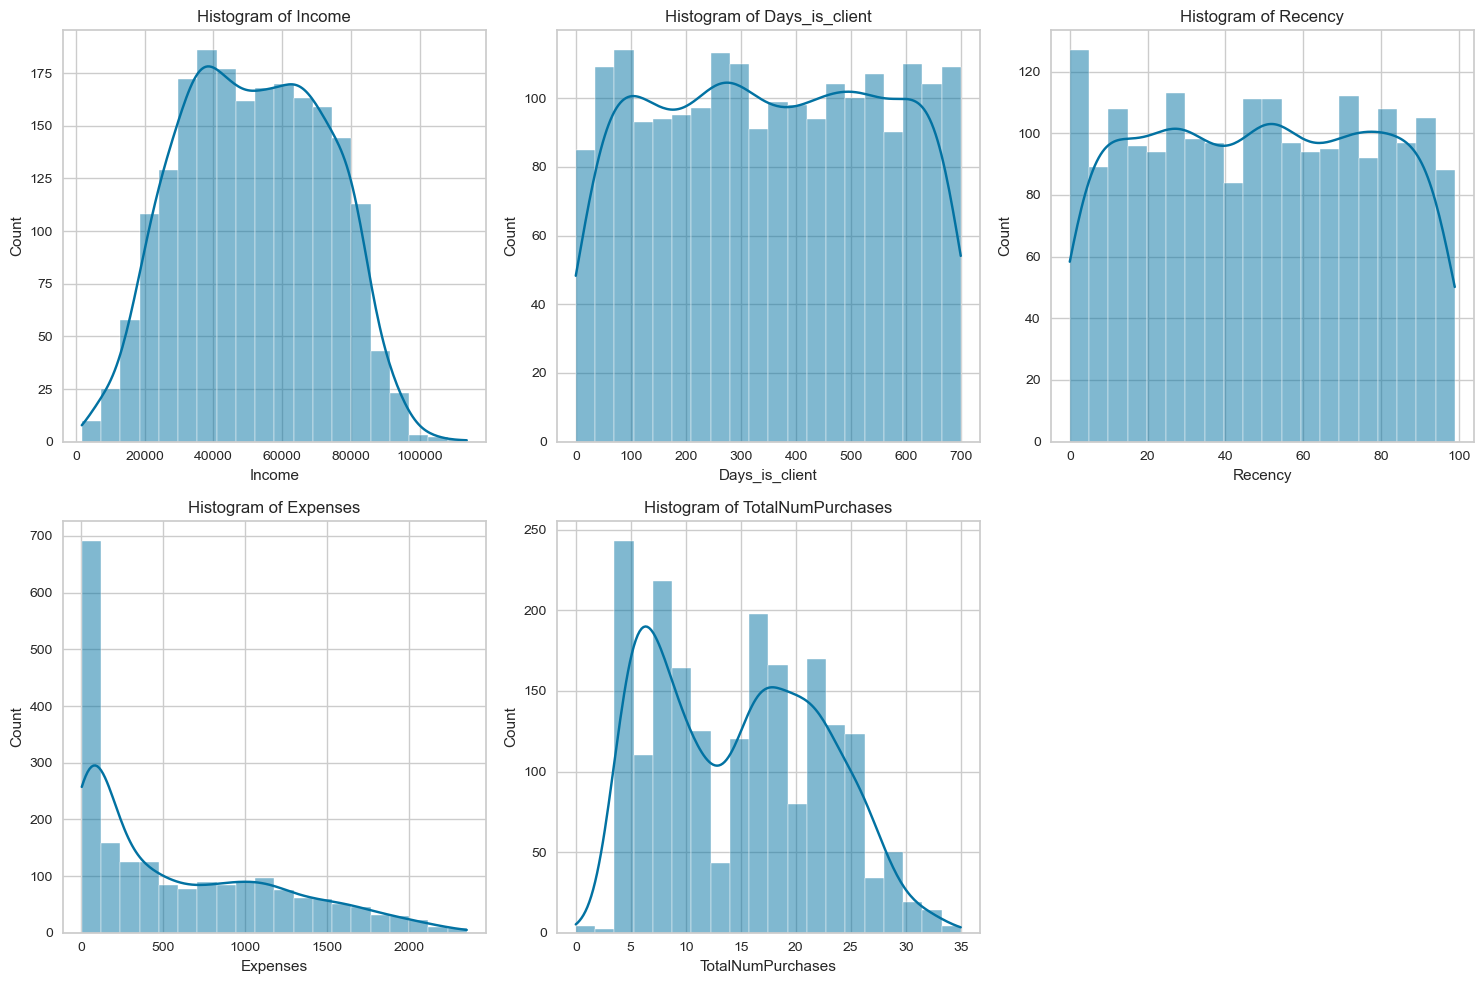

In [41]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 row, 3 columns
axes = axes.flatten()  

for i, column in enumerate(numerical_columns):
    sns.histplot(data=df, x=column, kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')
    
# Removes extra graph if are less than 6
for j in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout() 
plt.show()

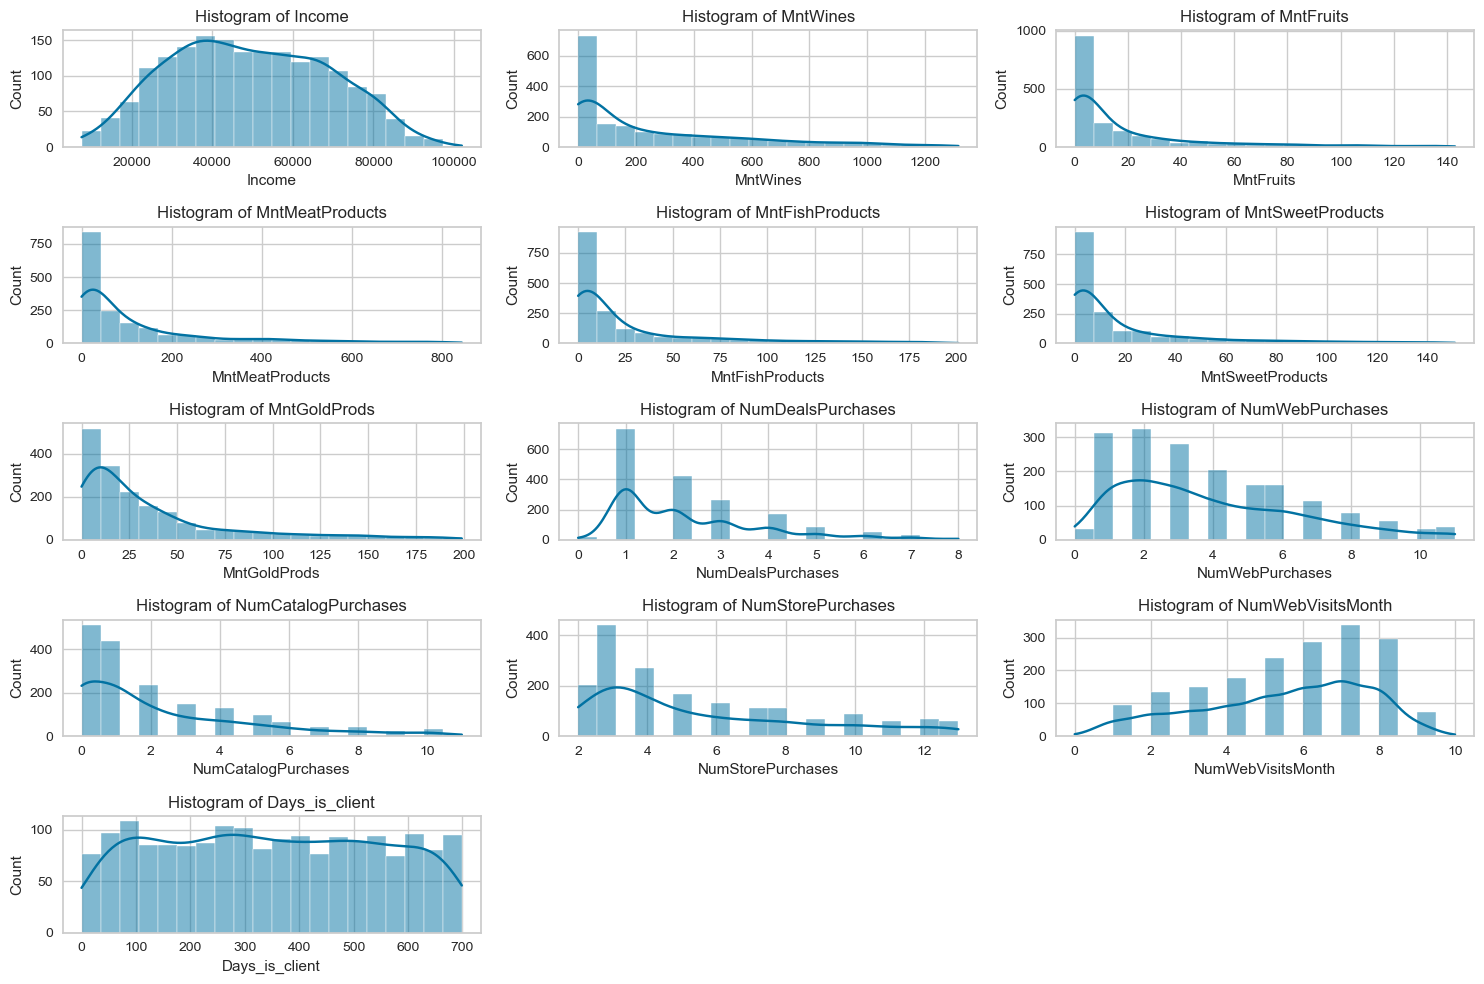

In [42]:
#Histograms for df_2
fig, axes = plt.subplots(5, 3, figsize=(15, 10))  # 2 row, 3 columns
axes = axes.flatten()  

for i, column in enumerate(numerical_columns_2):
    sns.histplot(data=df_2, x=column, kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')
    
# Removes extra graph
for j in range(len(numerical_columns_2), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout() 
plt.show()

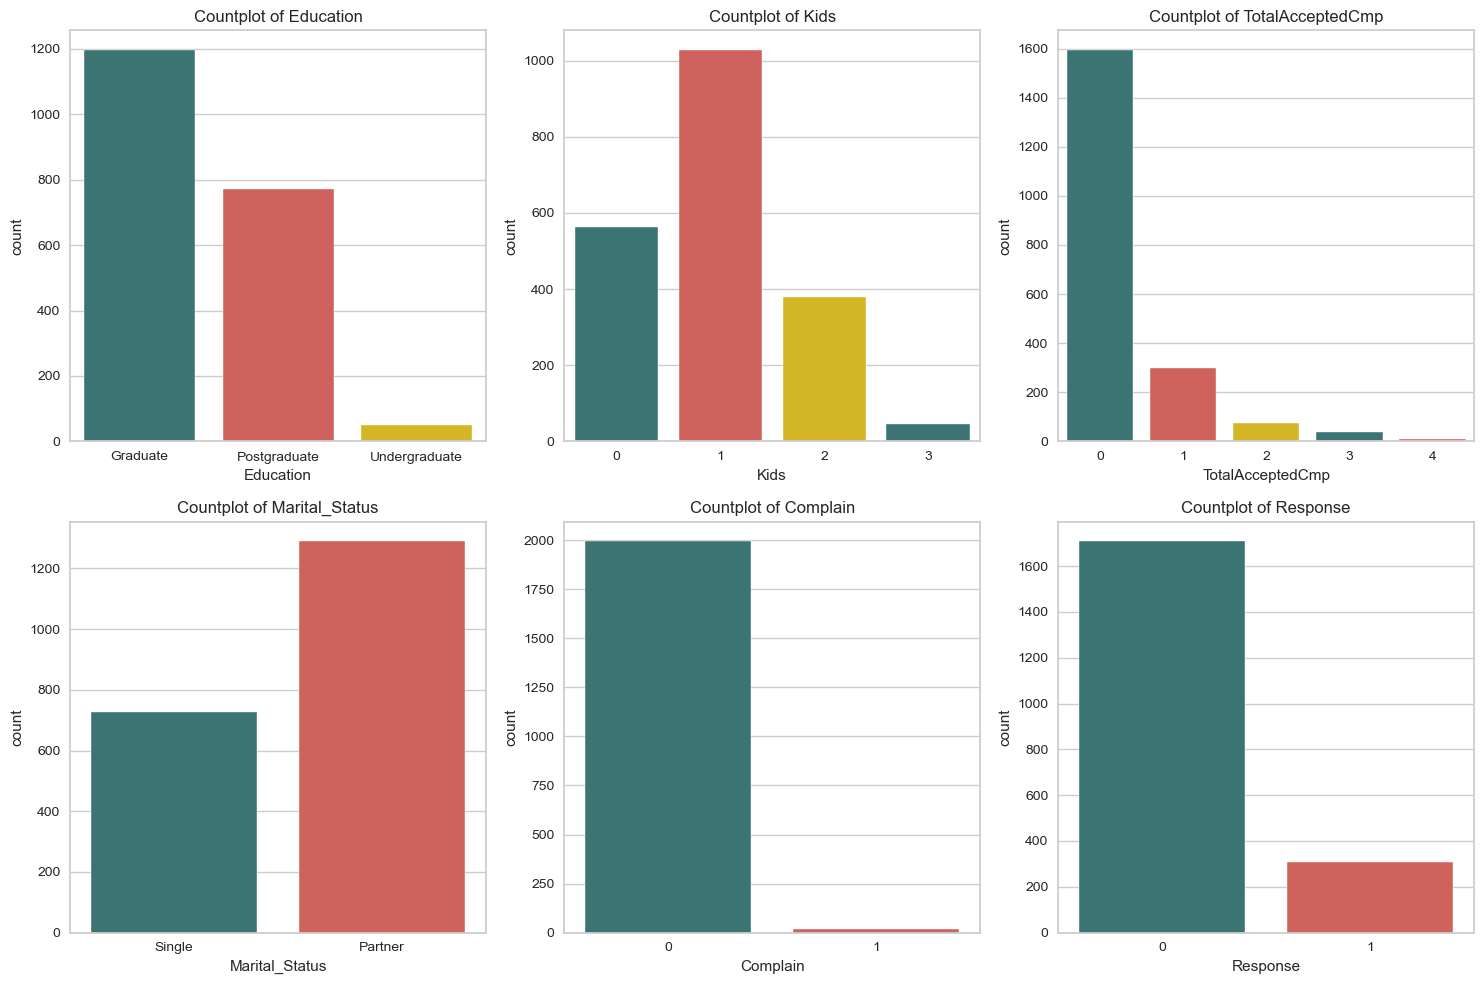

In [43]:
# Define the color palette
custom_palette = ["#327D7C", "#E2504A", "#F0C808"]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 row, 3 columns
axes = axes.flatten()  
columns_to_plot = categorical_columns + binary_columns

# Plot countplots for each categorical column
for i, column in enumerate(columns_to_plot):
    
    sns.countplot(data=df, x=column, palette=custom_palette, ax=axes[i])  # Use the subplot axis
    axes[i].set_title(f'Countplot of {column}')  # Set title for each subplot

    
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

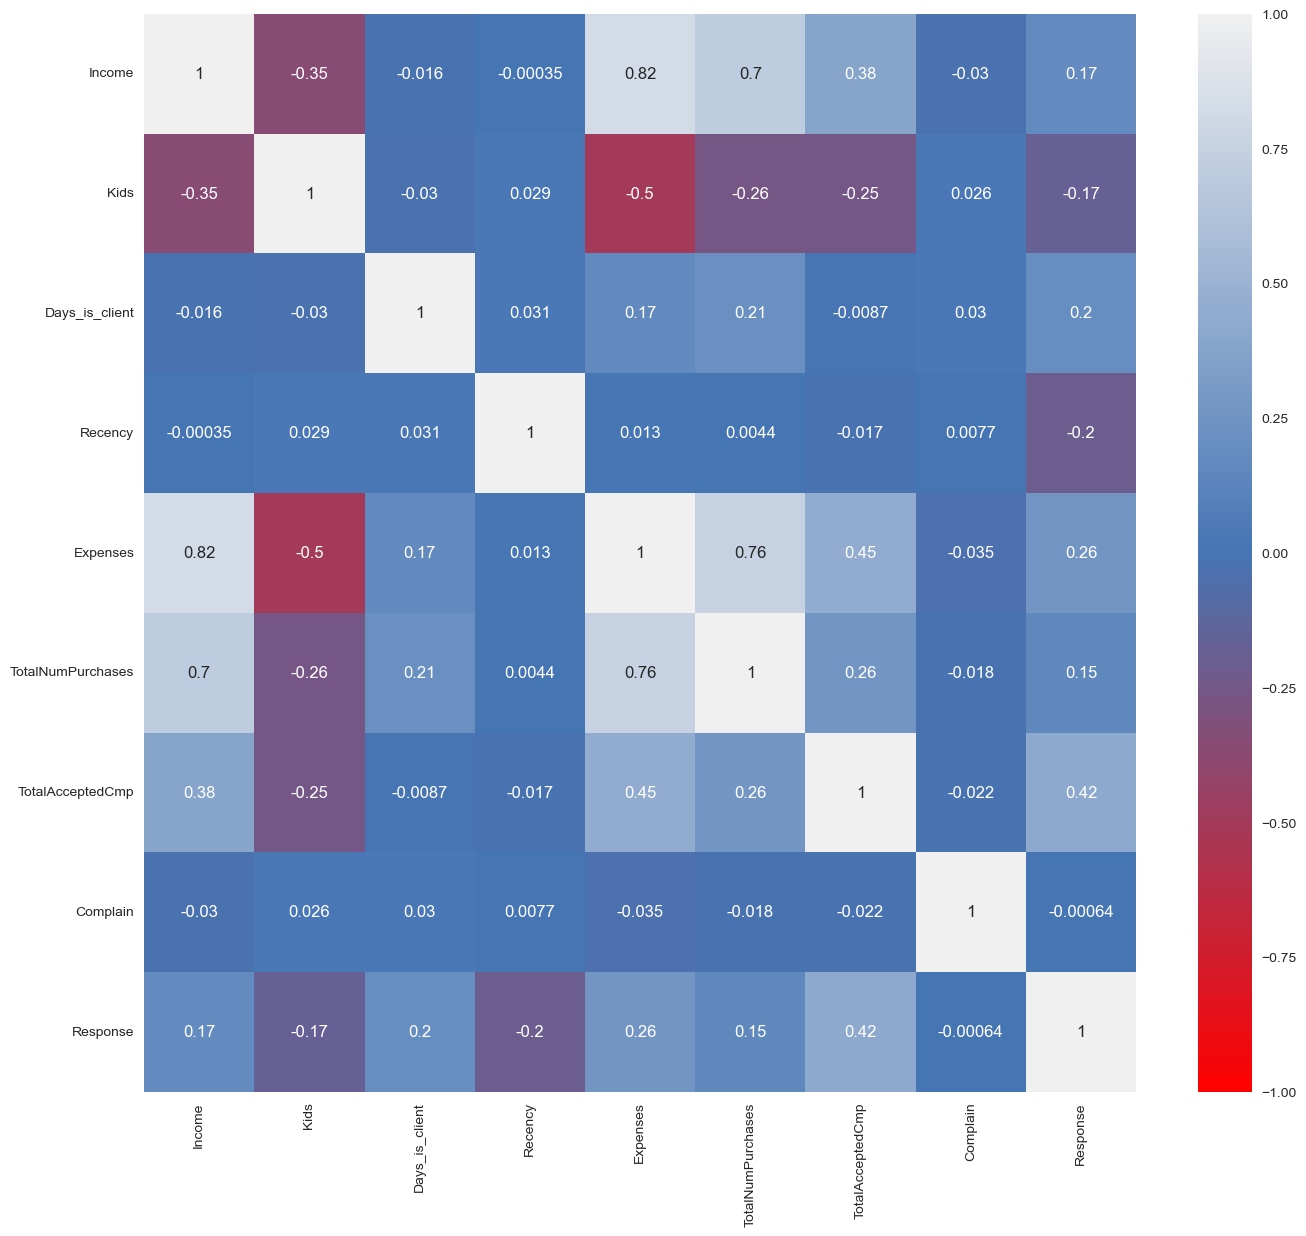

In [44]:
colors = ["#FF0000", "#4575B4", "#F0F0F0"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

# Example correlation matrix
corr_df= df.corr(numeric_only=True)

# Plotting the heatmap
plt.figure(figsize=(16,14))
sns.heatmap(corr_df, cmap=cmap, center=0, vmin=-1, annot=True)
plt.show()

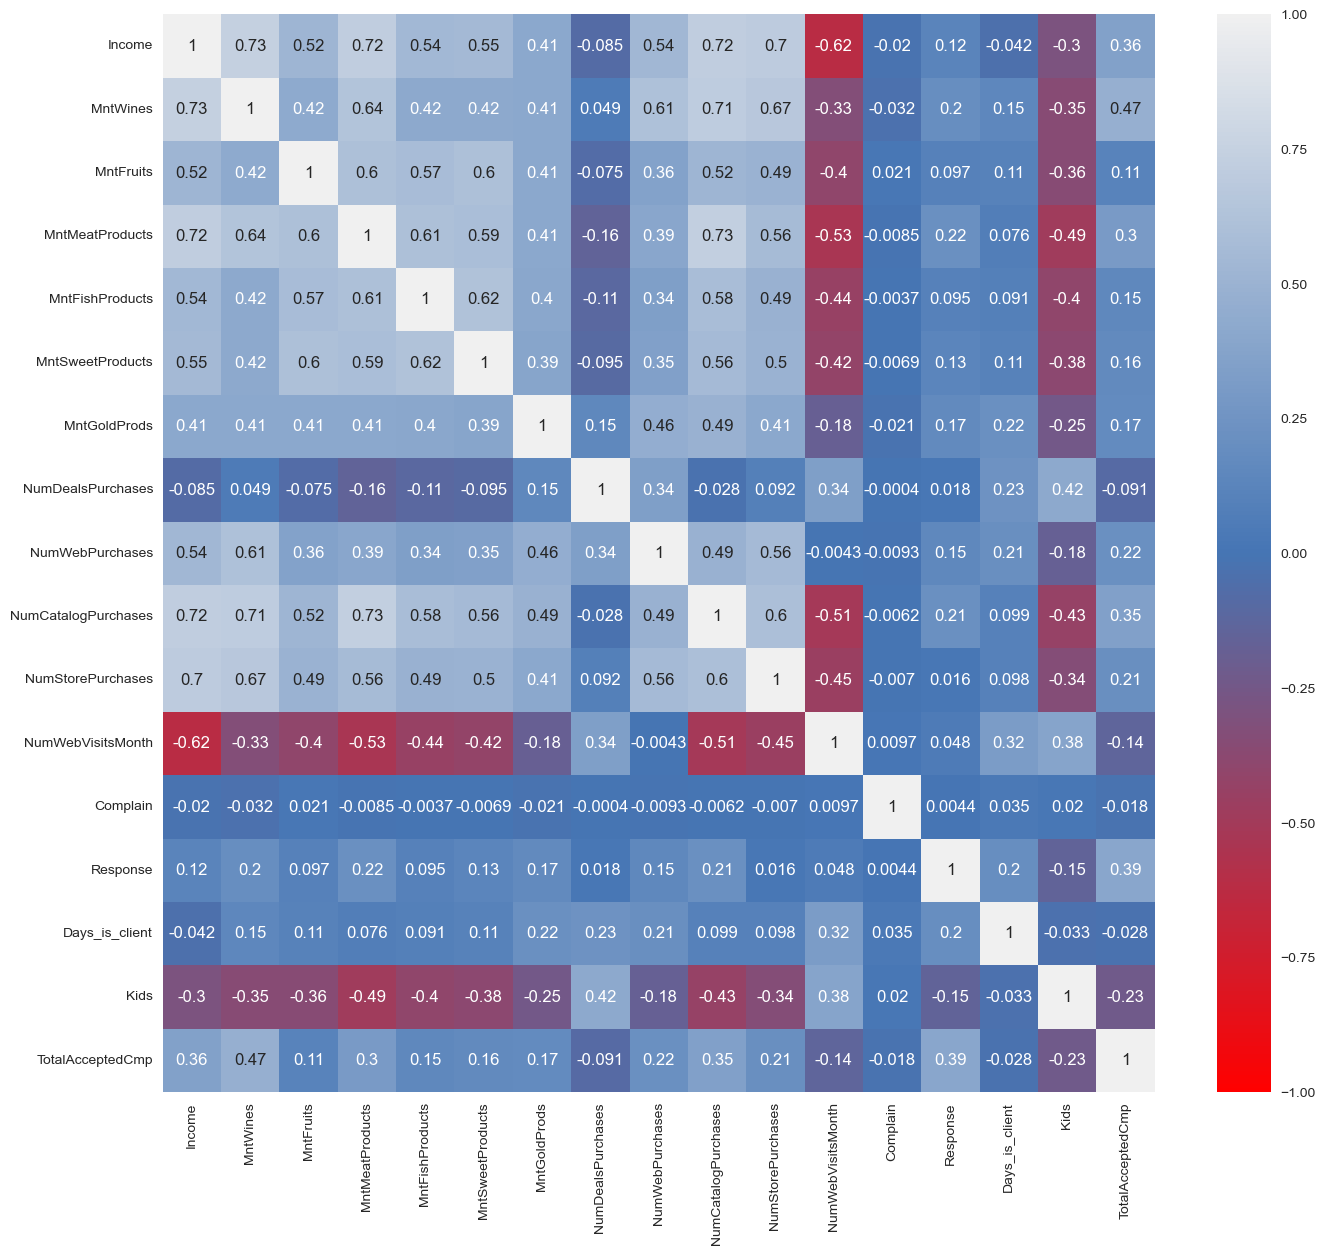

In [45]:
#Heatmap for df_2
colors = ["#FF0000", "#4575B4", "#F0F0F0"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

# Example correlation matrix
corr_df_2= df_2.corr(numeric_only=True)

# Plotting the heatmap
plt.figure(figsize=(16,14))
sns.heatmap(corr_df_2, cmap=cmap, center=0, vmin=-1, annot=True)
plt.show()

*Observations:*
- The set of histograms displays the distributions of numerical variables like Income, Expenses, and TotalNumPurchases. For example, Income is right-skewed with most values below 100,000, while Expenses peak around 500.
- Categorical count plots (e.g., Education, Kids, Response) reveal imbalances. For instance, most customers have 0 kids, and over 1,200 have graduate education, highlighting dominant groups.
- The heatmap of correlations indicates strong relationships between Expenses and Income (0.65) and between Expenses and TotalNumPurchases (0.75), while variables like Kids and Income show a negative correlation (-0.29).
- Minimal correlation is seen for variables such as Recency and Days_is_client (near 0), indicating independence.
- These plots effectively summarize key trends and relationships in the data, with some distributions and correlations guiding potential predictive features.

### DATA PREPROCESSING

*Scaling*

In [49]:
le = LabelEncoder()
ds = df.copy()

# Converting 'Education' and 'Marital_Status'
ds['Education'] = le.fit_transform(ds['Education'])
ds['Marital_Status'] = le.fit_transform(ds['Marital_Status'])

# Now scaling
cols_del = ['TotalAcceptedCmp', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)

scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds), columns=ds.columns)

# Visualizing the result
scaled_ds.head()

Education  Marital_Status    Income      Kids  Days_is_client   Recency  \
0  -0.795172        1.332989  0.314294 -1.280487        1.532802  0.314655   
1  -0.795172        1.332989 -0.256794  1.404341       -1.182870 -0.375412   
2  -0.795172       -0.750194  0.966779 -1.280487       -0.200291 -0.789453   
3  -0.795172       -0.750194 -1.210608  0.061927       -1.054493 -0.789453   
4   1.049554       -0.750194  0.321799  0.061927       -0.945866  1.556777   

   Expenses  TotalNumPurchases  
0  1.702872           1.344913  
1 -0.966156          -1.171600  
2  0.291141           0.815120  
3 -0.922512          -0.906704  
4 -0.303096           0.550224

In [50]:
#Scaling for df_2
ds_2 = df_2.copy()

# Converting 'Education' and 'Marital_Status'
ds_2['Education'] = le.fit_transform(ds_2['Education'])
ds_2['Marital_Status'] = le.fit_transform(ds_2['Marital_Status'])

# Scaling
cols_del_2 = ['TotalAcceptedCmp', 'Complain', 'Response']
ds_2 = ds_2.drop(cols_del, axis=1)

scaler = StandardScaler()
scaler.fit(ds_2)
scaled_ds_2 = pd.DataFrame(scaler.transform(ds_2), columns=ds_2.columns)

# Visualizing the result
scaled_ds_2.head()

Education  Marital_Status    Income  MntWines  MntFruits  MntMeatProducts  \
0  -0.819186        1.347604  0.453691  1.129462   2.336902         2.290208   
1  -0.819186        1.347604 -0.150125 -0.816028  -0.634489        -0.696077   
2  -0.819186       -0.742058  1.143569  0.477848   1.004899        -0.026928   
3  -0.819186       -0.742058 -1.158602 -0.816028  -0.532027        -0.618655   
4   1.003375       -0.742058  0.461626 -0.310949   0.799976        -0.076700   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0         3.404485          2.183916      1.201910           0.437729   
1        -0.628695         -0.626620     -0.726688          -0.192981   
2         1.957285          0.019480      0.120014          -0.823690   
3        -0.438898         -0.562010     -0.750207          -0.192981   
4         0.415187          0.213310     -0.515012           1.699147   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0         1.551741             2.988009          -0.494445           0.682445   
1        -1.116870            -0.504646          -1.129248          -0.227312   
2         1.551741            -0.116574           1.409965          -0.682191   
3        -0.735640            -0.892719          -0.494445           0.227566   
4         0.408050             0.271499           0.140359          -0.227312   

   Days_is_client      Kids  
0        1.569077 -1.399069  
1       -1.163538  1.362069  
2       -0.174829 -1.399069  
3       -1.034360 -0.018500  
4       -0.925056 -0.018500

### PCA

Principal components explained variance: [0.34915797 0.13213586 0.12636176]
Total explained variance: 60.765559740176634 %


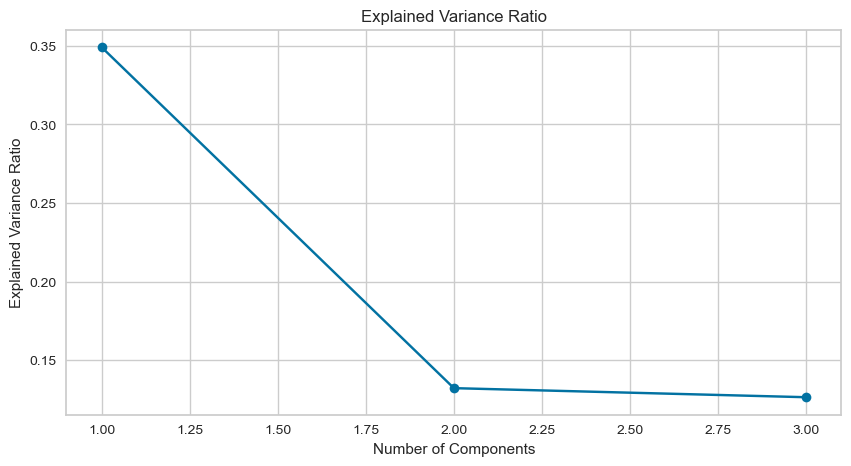

In [52]:
# Initiating PCA to reduce dimentions aka features to 3
n_components=3
pca = PCA(n_components)
X_pca=pca.fit_transform(scaled_ds)
PCA_ds = pd.DataFrame(X_pca, columns=(["component1","component2", "component3"]))

# Explained Variance by component
explained_variance = pca.explained_variance_ratio_

# Total explained variance by the firts n_components
total_explained_variance = explained_variance.sum()

print("Principal components explained variance:", explained_variance)
print("Total explained variance:", total_explained_variance * 100, "%")

plt.figure(figsize=(10, 5))
plt.plot(range(1, n_components + 1), explained_variance, 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio')
plt.show()

In [53]:
PCA_ds.describe().T

count          mean       std       min       25%       50%  \
component1  2016.0  5.551115e-17  1.671721 -3.262147 -1.592788 -0.189457   
component2  2016.0 -3.568574e-17  1.028402 -2.602755 -0.747881  0.025971   
component3  2016.0  3.172066e-17  1.005682 -2.022587 -0.825330 -0.164473   

                 75%       max  
component1  1.465390  4.036980  
component2  0.709429  2.925164  
component3  0.779824  3.222729

The PCA reduced the dataset to three components.

- Component 1 explains the most variance (std: 1.67).

- Component 2 (std: 1.02).

- Component 3 captures the least variability (std: 1.00). 

The dimensionality reduction simplifies the data, retaining most of the information for clustering or further analysis. The decreasing variance across components suggests an effective compression of key features into fewer dimensions.

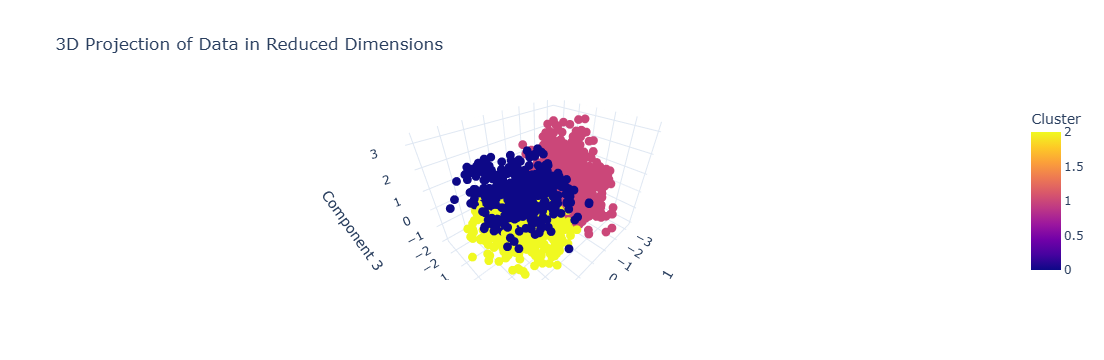

In [55]:
from sklearn.cluster import KMeans

# Apply clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Modifica `n_clusters` in base alle tue necessità
y_kmeans = kmeans.fit_predict(scaled_ds)

# Add clusters to PCA result dataframe
PCA_ds['Cluster'] = y_kmeans

# 3d graph
import plotly.express as px

fig = px.scatter_3d(
    PCA_ds,
    x="component1",
    y="component2",
    z="component3",
    color='Cluster',  # Usa la colonna Cluster per assegnare i colori
    title="3D Projection of Data in Reduced Dimensions",
    template="plotly_white",
    color_discrete_sequence=px.colors.qualitative.Set1  # Paletta colori
)

fig.update_traces(marker=dict(size=5))
fig.update_layout(
    scene=dict(
        xaxis_title="Component 1",
        yaxis_title="Component 2",
        zaxis_title="Component 3"
    ),
    legend=dict(title="Clusters", font=dict(size=10))
)

fig.show()

The 3D projection displays the clustering results in the reduced dimensionality space. The clusters are well-separated, particularly in Components 1 and 3, indicating that these dimensions capture significant variability among the groups. Component 2 appears less critical for distinguishing clusters, as points overlap more along this axis. Overall, the visualization effectively illustrates the separation of clusters achieved, with distinct groupings suggesting meaningful segmentation of the dataset.

Varianza spiegata dai componenti principali: [0.40072802 0.12453698 0.07428319]
Varianza totale spiegata: 59.95481942556285 %


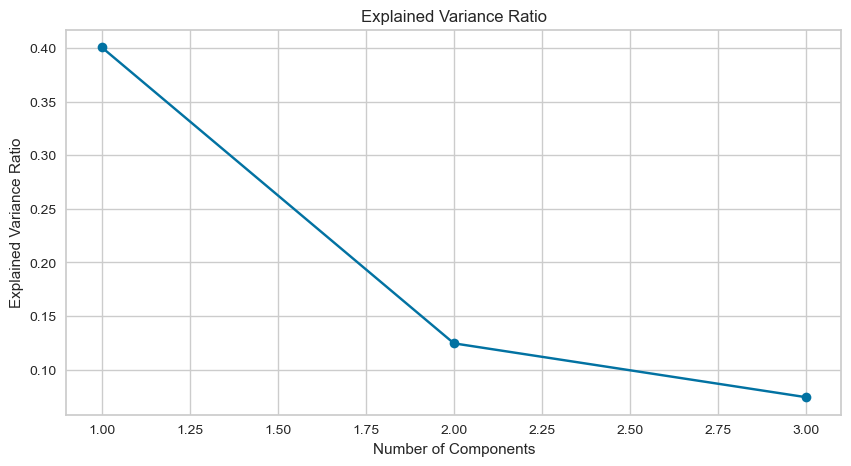

In [57]:
# Initiating PCA to reduce dimentions aka features to 3 for df_2
n_components=3
pca_2 = PCA(n_components)
X_pca_2=pca_2.fit_transform(scaled_ds_2)
PCA_ds_2 = pd.DataFrame(pca_2.transform(scaled_ds_2), columns=(["component1","component2", "component3"]))

# Explained Variance by component
explained_variance_2 = pca_2.explained_variance_ratio_

# Total explained variance
total_explained_variance_2 = explained_variance_2.sum()

print("Varianza spiegata dai componenti principali:", explained_variance_2)
print("Varianza totale spiegata:", total_explained_variance_2 * 100, "%")

plt.figure(figsize=(10, 5))
plt.plot(range(1, n_components + 1), explained_variance_2, 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio')
plt.show()

In [58]:
PCA_ds_2.describe().T

count          mean       std       min       25%       50%  \
component1  1791.0  8.926416e-17  2.532830 -3.223288 -2.186200 -0.871219   
component2  1791.0  4.264843e-17  1.411986 -3.201046 -1.036513 -0.198971   
component3  1791.0 -1.190189e-17  1.090502 -3.136381 -0.801818 -0.050083   

                 75%       max  
component1  2.028245  7.925011  
component2  0.866373  4.774608  
component3  0.799299  3.051245

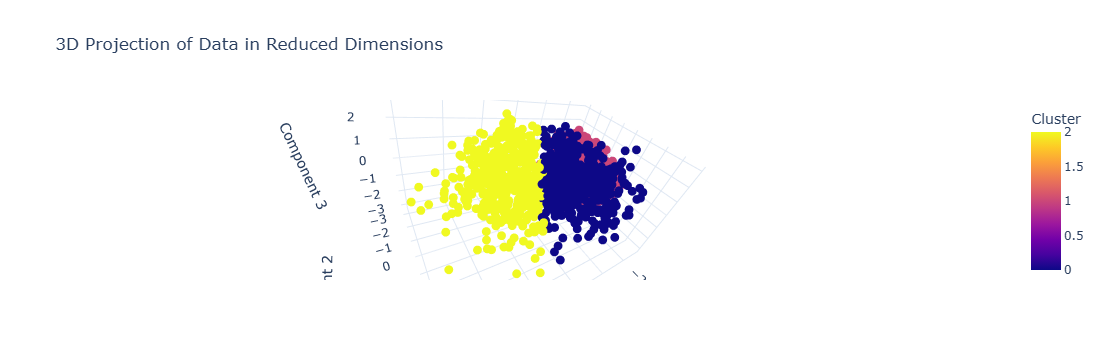

In [59]:
#Clustering df_2
from sklearn.cluster import KMeans

# Apply clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Modifica `n_clusters` in base alle tue necessità
y_kmeans_2 = kmeans.fit_predict(scaled_ds_2)

# Add cluster to PCA results dataframe
PCA_ds_2['Cluster'] = y_kmeans_2

# 3d graph
import plotly.express as px

fig = px.scatter_3d(
    PCA_ds_2,
    x="component1",
    y="component2",
    z="component3",
    color='Cluster',  # Usa la colonna Cluster per assegnare i colori
    title="3D Projection of Data in Reduced Dimensions",
    template="plotly_white",
    color_discrete_sequence=px.colors.qualitative.Set1  # Paletta colori
)

fig.update_traces(marker=dict(size=5))
fig.update_layout(
    scene=dict(
        xaxis_title="Component 1",
        yaxis_title="Component 2",
        zaxis_title="Component 3"
    ),
    legend=dict(title="Clusters", font=dict(size=10))
)

fig.show()

### FCA for the categorical variables 

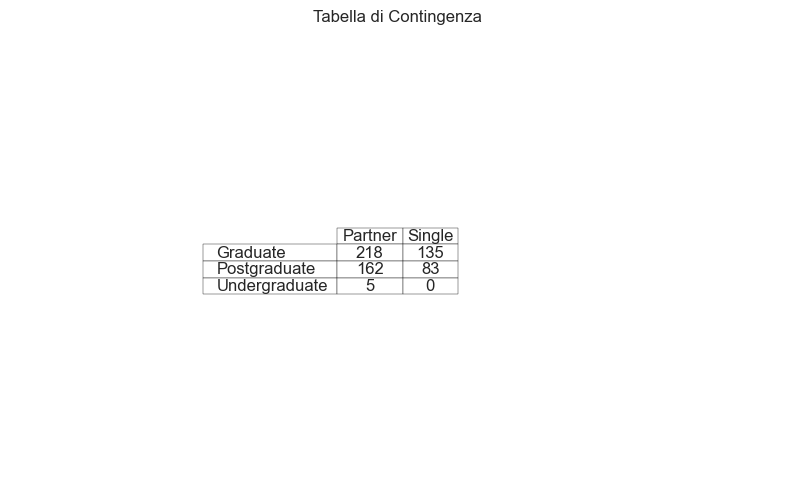

Marital_Status  Partner  Single
Education                      
Graduate            218     135
Postgraduate        162      83
Undergraduate         5       0


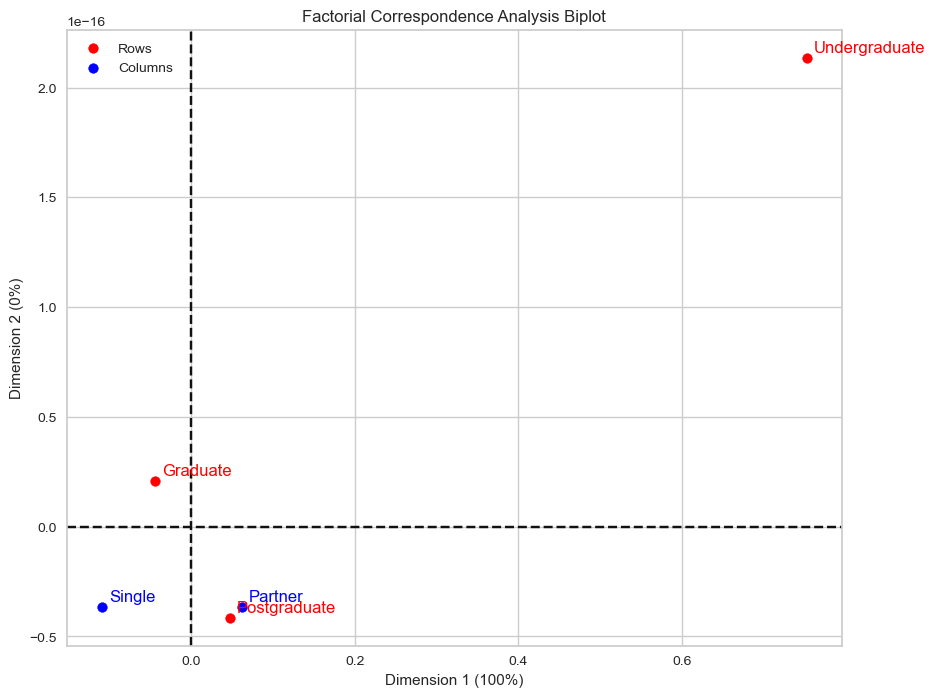

In [61]:
"""
Perform Factorial Correspondence Analysis from a contingency table.

Parameters:
contingency_table (numpy.array): 2D array representing the contingency table
row_labels (list): Labels for the rows
col_labels (list): Labels for the columns
normalize (bool): Whether to normalize FCA coordinates (default: True)

Returns:
F (numpy.array): Principal coordinates for rows
G (numpy.array): Principal coordinates for columns
"""

# Contingency table
contingency_table = pd.crosstab(
    index=df['Marital_Status'], 
    columns=df['Education'], 
    values=df['TotalAcceptedCmp'], 
    aggfunc='sum').T

fig, ax = plt.subplots(figsize=(10, 6)) 
ax.axis('tight') 
ax.axis('off')   

# Table representation
table = ax.table(
    cellText=contingency_table.values, 
    rowLabels=contingency_table.index, 
    colLabels=contingency_table.columns,  
    cellLoc='center',  
    loc='center')

table.set_fontsize(12)
table.auto_set_column_width(col=list(range(len(contingency_table.columns))))  # Regola larghezza colonne

plt.title("Tabella di Contingenza")
plt.show()

print(contingency_table)
# Computation on contingency table
row_sums = contingency_table.sum(axis=1)
col_sums = contingency_table.sum(axis=0)
total = contingency_table.sum().sum()
rank = min(contingency_table.shape[0], contingency_table.shape[1])

# Diagonal matrix
D_r = np.diag(row_sums)
D_c = np.diag(col_sums)

# R matrix
expected = np.outer(row_sums, col_sums) / total
R = (contingency_table - expected) / np.sqrt(expected)

# Singular Value Decomposition
U, s, Vt = np.linalg.svd(R, full_matrices=True)

# Principal coordinates computation

normalize = True
if normalize:
    F = np.dot(np.linalg.inv(np.sqrt(D_r)), U)[:, :rank] * s
    G = np.dot(np.linalg.inv(np.sqrt(D_c)), Vt.T)[:, :rank] * s
else:
    F = U[:, :rank] * s
    G = Vt.T[:, :rank] * s

row_labels = contingency_table.index.tolist()
col_labels = contingency_table.columns.tolist()

# Biplot
ind0, ind1 = 0, 1 
plt.figure(figsize=(10, 8))

# Scatter plot rows
plt.scatter(F[:, ind0], F[:, ind1], color='red', label='Rows')
# Scatter plot columns
plt.scatter(G[:, ind0], G[:, ind1], color='blue', label='Columns')

# Labels
ec1 = 0.01 * (max(np.amax(F[:, ind0]), np.amax(G[:, ind0])) - min(np.amin(F[:, ind0]), np.amin(G[:, ind0])))
ec2 = 0.01 * (max(np.amax(F[:, ind1]), np.amax(G[:, ind1])) - min(np.amin(F[:, ind1]), np.amin(G[:, ind1])))
for i, txt in enumerate(row_labels):
    plt.annotate(txt, (F[i, ind0] + ec1, F[i, ind1] + ec2), color='red')
for i, txt in enumerate(col_labels):
    plt.annotate(txt, (G[i, ind0] + ec1, G[i, ind1] + ec2), color='blue')

# Explained Variance by first two dimensions
per1 = int(100 * s[0]**2 / np.power(s, 2).sum())
per2 = int(100 * s[1]**2 / np.power(s, 2).sum())
plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=0, color='k', linestyle='--')
plt.xlabel(f'Dimension 1 ({per1}%)')
plt.ylabel(f'Dimension 2 ({per2}%)')
plt.title('Factorial Correspondence Analysis Biplot')
plt.legend()
plt.grid(True)
plt.show()

### CLUSTERING

*BRIEF EXPLANATION OF K MEAN CLUSTERING*
- Initialization: The algorithm starts by randomly selecting a predefined number of cluster centers (centroids)
- Assignment: Each data point is assigned to the nearest centroid, forming initial clusters
- Update: The centroids are recalculated as the average position of all points within each cluster
- Iteration: The process of assignment and updating continues until the centroids stabilize and no longer change significantly
- Final output: The result is a set of clusters where data points in the same cluster are more similar to each other than to those in other clusters

*Encoding categorical variables*

In [64]:
# Define categorical columns to be one-hot encoded
categorical_columns = df.select_dtypes(include=['object']).columns 

# Apply one-hot encoding directly with pandas
X_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True, dtype=int) 

# Instantiate Scaler
scaler = StandardScaler()

# fit_transform
X_scaled = scaler.fit_transform(X_encoded)
X_scaled.shape

(2016, 12)

In [65]:
# Initialize the KMeans algorithm with 2 clusters and a maximum of 50 iterations
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, max_iter=50, random_state = 101)

# Fit the KMeans algorithm
kmeans.fit(X_scaled)

# Predict the cluster labels 
y_kmeans = kmeans.fit_predict(X_scaled)

# Transform the scaled data back to its original scale using the inverse transformation
X_transformed = scaler.inverse_transform(X_scaled)

In [66]:
pd.DataFrame(X_transformed, columns=X_encoded.columns).head()

Income  Kids  Days_is_client  Recency  Expenses  TotalNumPurchases  \
0  58138.0   0.0           663.0     58.0    1617.0               25.0   
1  46344.0   2.0           113.0     38.0      27.0                6.0   
2  71613.0   0.0           312.0     26.0     776.0               21.0   
3  26646.0   1.0           139.0     26.0      53.0                8.0   
4  58293.0   1.0           161.0     94.0     422.0               19.0   

   TotalAcceptedCmp  Complain  Response  Education_Postgraduate  \
0               0.0       0.0       1.0                     0.0   
1               0.0       0.0       0.0                     0.0   
2               0.0       0.0       0.0                     0.0   
3               0.0       0.0       0.0                     0.0   
4               0.0       0.0       0.0                     1.0   

   Education_Undergraduate  Marital_Status_Single  
0                      0.0                    1.0  
1                      0.0                    1.0  
2                      0.0                    0.0  
3                      0.0                    0.0  
4                      0.0                    0.0

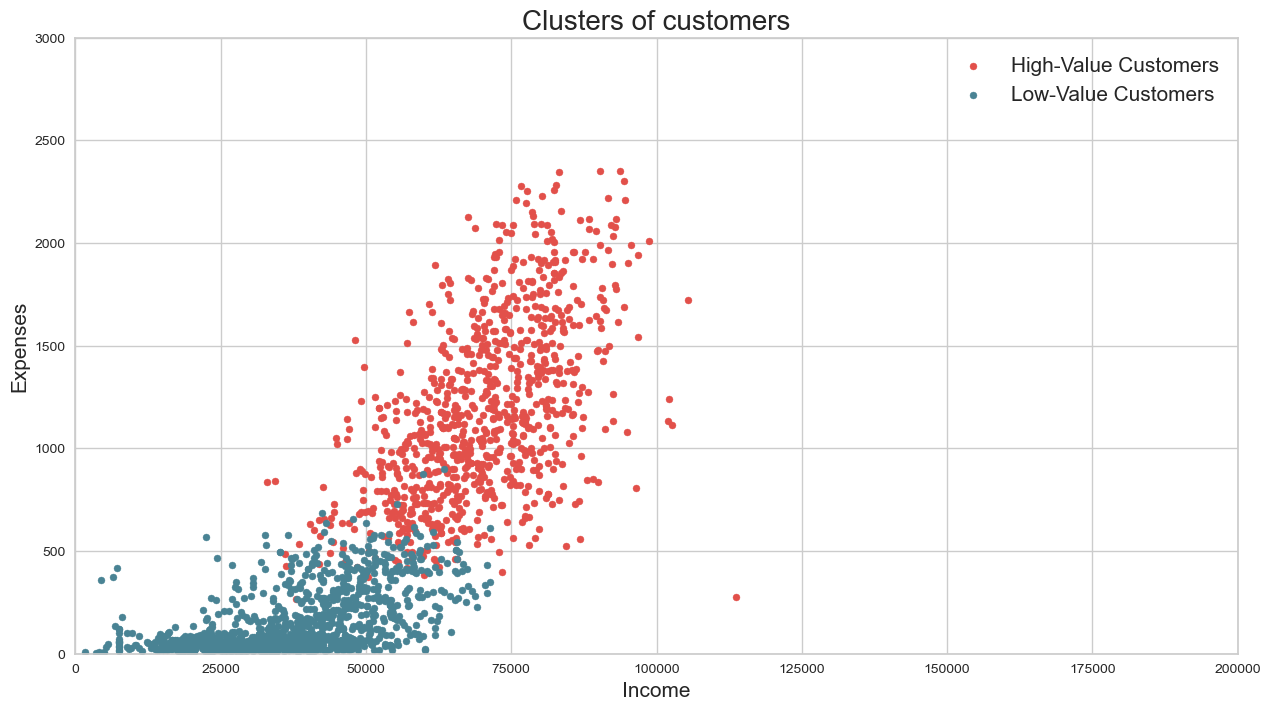

In [67]:
# Visualising the clusters with adjusted scale
plt.figure(figsize=(15, 8))

# Scatter plots
plt.scatter(X_transformed[y_kmeans == 1, 0], X_transformed[y_kmeans == 1, 4], 
            s=25, c='#E2504A', label='High-Value Customers')
plt.scatter(X_transformed[y_kmeans == 0, 0], X_transformed[y_kmeans == 0, 4], 
            s=25, c='#498394', label='Low-Value Customers')

# Limit fixing
plt.xlim(0, 200000)  # Limita l'asse X a valori significativi per il reddito
plt.ylim(0, 3000)    # Limita l'asse Y a valori significativi per le spese

plt.title('Clusters of customers', fontsize=20)
plt.xlabel('Income', fontsize=15)
plt.ylabel('Expenses', fontsize=15)
plt.legend(fontsize=15)

plt.show()

The plot shows two clusters: high-value customers with higher income and expenses, and low-value customers with lower values. This segmentation highlights distinct spending behaviors.

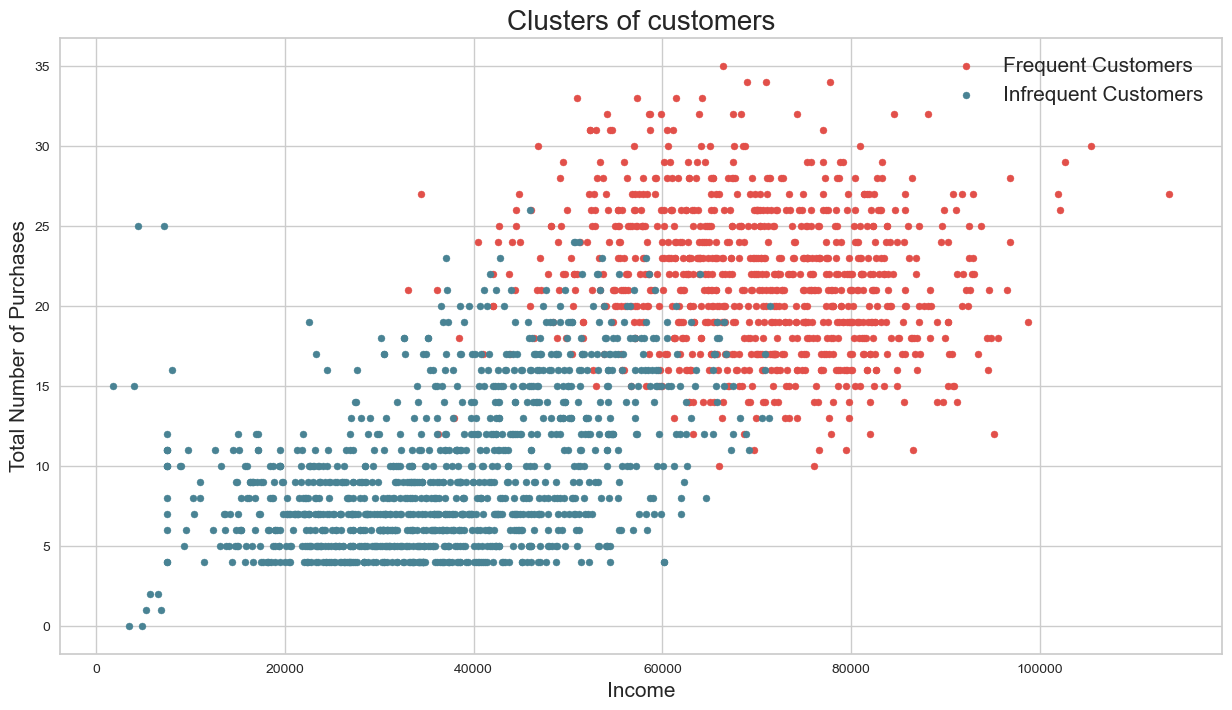

In [69]:
# Visualising the clusters
plt.figure(figsize= (15,8))

plt.scatter(X_transformed[y_kmeans == 1, 0], X_transformed[y_kmeans == 1, 5], s = 25, c = '#E2504A', label = 'Frequent Customers')
plt.scatter(X_transformed[y_kmeans == 0, 0], X_transformed[y_kmeans == 0, 5], s = 25, c = '#498394', label = 'Infrequent Customers')

plt.title('Clusters of customers',fontsize = 20)
plt.xlabel('Income',fontsize = 15)
plt.ylabel('Total Number of Purchases',fontsize = 15)
plt.legend(fontsize = 15)

plt.show()

The plot clusters customers by income and number of purchases. Red represents frequent, higher-income buyers, while blue shows infrequent, lower-income ones. This helps target strategies for different customer groups.

### THE ELBOW CURVE

The elbow curve is a graphical method used to determine the optimal number of clusters (k) in clustering algorithms like k-means. It plots the Sum of Squared Distances (SSD) for different cluster counts. The "elbow" point, where the rate of decrease sharply changes, indicates the best k, balancing simplicity and accuracy.

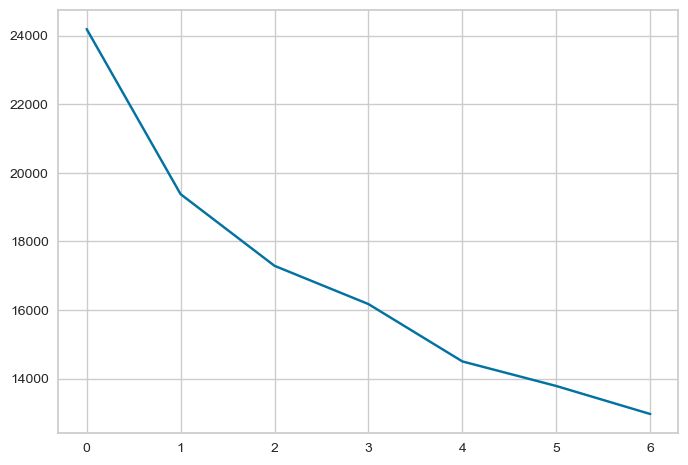

In [72]:
# Elbow-curve/SSD

ssd = []
range_n_clusters = [1, 2, 3, 4, 5, 6, 7]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=101)
    kmeans.fit(X_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)
plt.show()

### SILHOUETTE ANALYSIS
Silhouette analysis evaluates the quality of clustering by measuring how close each data point is to points within its own cluster compared to points in other clusters. A silhouette score (ranging from -1 to 1) is calculated for each point: values close to 1 indicate good clustering, near 0 suggest cluster overlap, and negative values mean incorrect assignment. It helps identify the optimal number of clusters by comparing average scores.

In [74]:
# Silhouette analysis

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=101)
    kmeans.fit(X_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print("For n_clusters = {0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters = 2, the silhouette score is 0.20411433475745702
For n_clusters = 3, the silhouette score is 0.22406083529792709
For n_clusters = 4, the silhouette score is 0.1568081536968042
For n_clusters = 5, the silhouette score is 0.17733763657269835
For n_clusters = 6, the silhouette score is 0.1710100515345861
For n_clusters = 7, the silhouette score is 0.17326694769302073
For n_clusters = 8, the silhouette score is 0.1704714408985656
For n_clusters = 9, the silhouette score is 0.1774926088664735
For n_clusters = 10, the silhouette score is 0.184151510525325


*Considerations:*

The Elbow Curve and the Silhouette Analysis both suggest that 3 clusters provide the best solution.

### K Mean with the chosen number of clusters

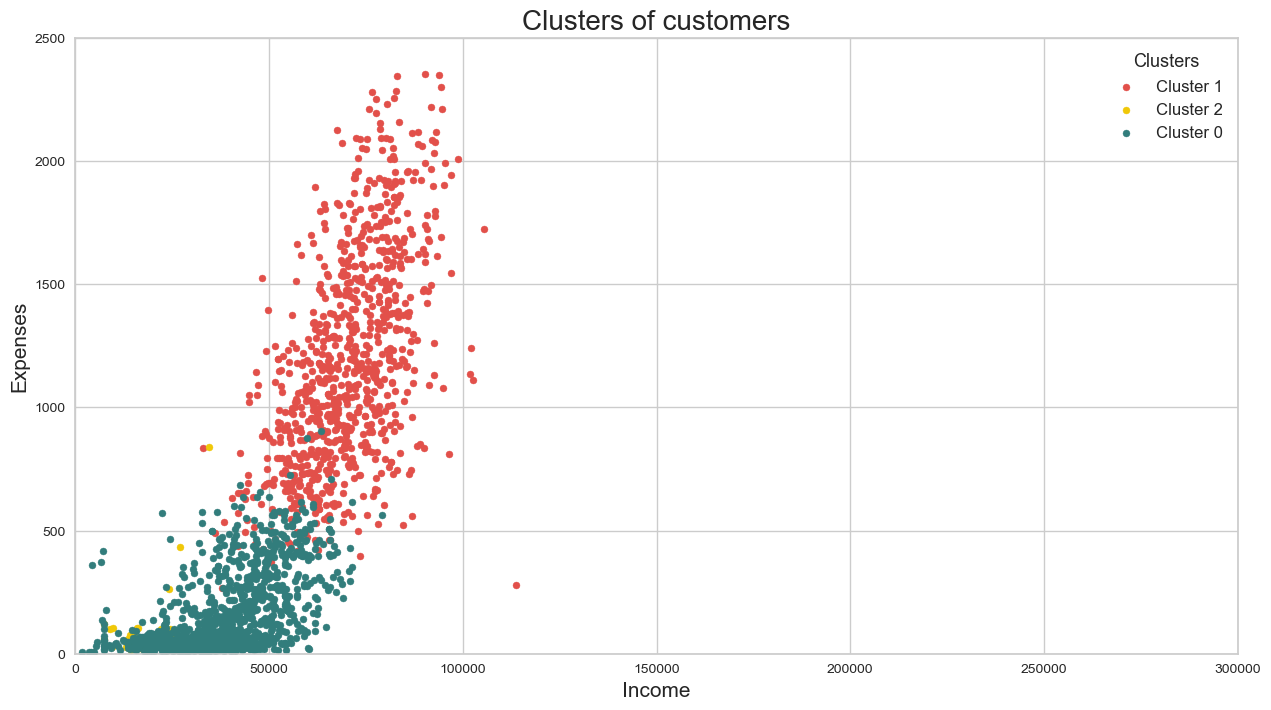

In [77]:
# Define categorical columns to be one-hot encoded
categorical_columns = df.select_dtypes(include=['object']).columns 

# Apply one-hot encoding directly with pandas
X_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True, dtype=int)

# Instantiate Scaler
scaler = StandardScaler()

# Fit and transform the data
X_scaled = scaler.fit_transform(X_encoded)

# Initialize the KMeans algorithm with chosen k
kmeans = KMeans(n_clusters=3, max_iter=50, random_state=101)

# Fit the KMeans algorithm
kmeans.fit(X_scaled)

# Predict the cluster labels
y_kmeans = kmeans.fit_predict(X_scaled)

# Transform the scaled data back to its original scale using the inverse transformation
X_transformed = scaler.inverse_transform(X_scaled)

# Manual scale settings (example values for this dataset)
x_min, x_max = 0, 300000  # Income range
y_min, y_max = 0, 2500     # Expenses range

# Visualizing the clusters with manual scaling
plt.figure(figsize=(15, 8))

# Scatter plot for the clusters
plt.scatter(X_transformed[y_kmeans == 1, 0], X_transformed[y_kmeans == 1, 4], 
            c="#E2504A", s=25, label="Cluster 1")
plt.scatter(X_transformed[y_kmeans == 2, 0], X_transformed[y_kmeans == 2, 4], 
            c="#F0C808", s=25, label="Cluster 2")
plt.scatter(X_transformed[y_kmeans == 0, 0], X_transformed[y_kmeans == 0, 4], 
            c="#327D7C", s=25, label="Cluster 0")

# Manually setting the axis limits
plt.xlim(x_min, x_max)  # X axis (Income)
plt.ylim(y_min, y_max)  # Y axis (Expenses)

# Adding title and axis labels
plt.title('Clusters of customers', fontsize=20)
plt.xlabel('Income', fontsize=15)
plt.ylabel('Expenses', fontsize=15)

# Adding legend with titles
plt.legend(title="Clusters", fontsize=12, title_fontsize=13)

# Show the plot
plt.show()

This scatter plot illustrates customer segmentation by income (x-axis) and expenses (y-axis). Three clusters are visible: Cluster 0 (yellow) represents low-income, low-expense customers; Cluster 1 (green) indicates moderate income and expense levels; Cluster 2 (red) consists of high-income, high-expense customers. The clear separation reflects distinct spending and earning patterns across groups.

### PROFILING CUSTOMERS

After data analysis, customer profiling involves segmenting customers into homogeneous groups based on common characteristics such as demographics, purchasing behaviors, and preferences. These profiles help personalize marketing strategies, improve customer satisfaction, and optimize offers.

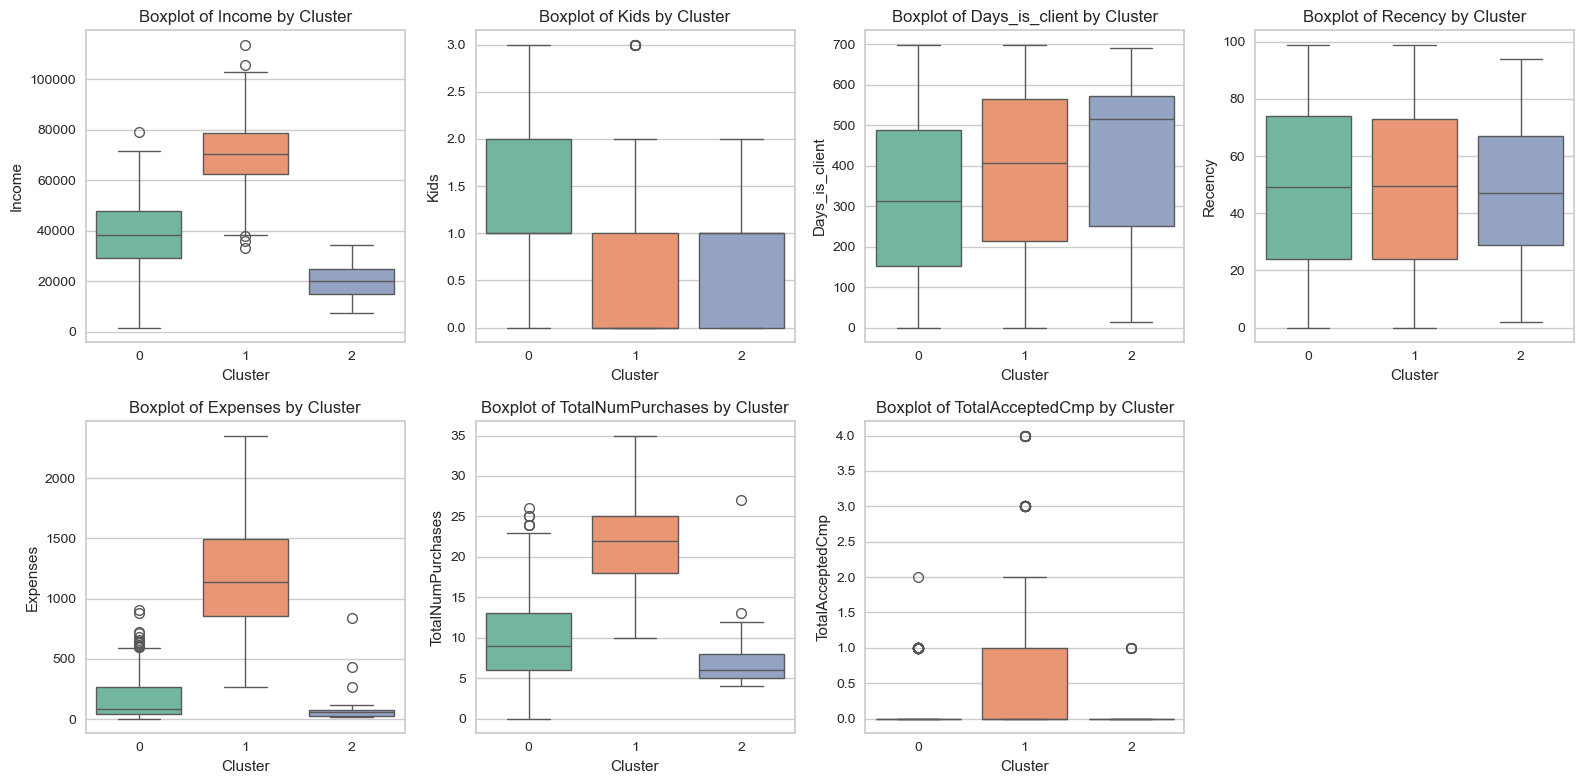

In [80]:
# Create a copy of the original DataFrame and add a new column 'Cluster'
df_clusters = df.copy()
df_clusters['Cluster'] = y_kmeans

# Select numerical columns to plot
columns_to_plot = ['Income', 'Kids', 'Days_is_client', 'Recency', 'Expenses', 'TotalNumPurchases', 'TotalAcceptedCmp']

# Plot boxplots for each numerical column in a 2x4 grid
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    sns.boxplot(x='Cluster', y=column, data=df_clusters, palette='Set2', ax=axes[i])
    axes[i].set_title(f'Boxplot of {column} by Cluster')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(column)
    
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()


These boxplots compare key features (e.g., income, expenses, purchases, etc.) across clusters. Cluster 2 has the highest income, expenses, and purchases, while Cluster 0 has the lowest values for most metrics. Cluster 1 shows intermediate characteristics. The boxplots effectively highlight variability and outliers within and between clusters.

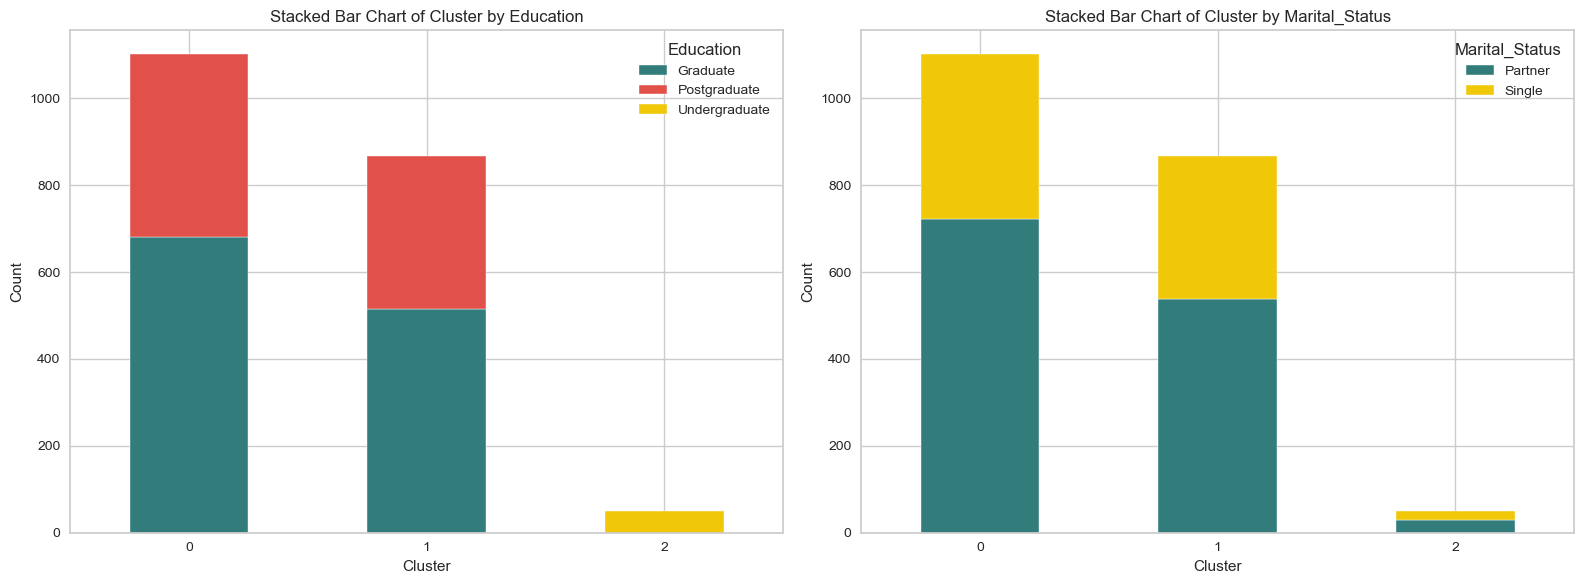

In [82]:
# Define the custom colormap
cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_palette)

# List of categorical columns to plot
categorical_columns = ['Education', 'Marital_Status']

# Create a 1x2 grid for the subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for i, column in enumerate(categorical_columns):
    # Prepare data
    data = df_clusters.groupby(['Cluster', column]).size().unstack().fillna(0)
    
    # Plot stacked bar chart
    data.plot(kind='bar', stacked=True, ax=axes[i], colormap=cmap)
    
    axes[i].set_title(f'Stacked Bar Chart of Cluster by {column}')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel('Count')
    axes[i].legend(title=column)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=0)
    
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


These charts analyze clusters by education level and marital status. Cluster 2 contains a higher proportion of postgraduates and partnered individuals, while Clusters 0 and 1 include more undergraduates and singles. This breakdown offers deeper demographic insights for each cluster.

#### Cluster 0 (Low-Value Customers):

- Income: Lowest among the clusters, indicating limited financial capacity.
- Education: Primarily undergraduates, with very few postgraduates.
- Marital Status: Majority are single, with fewer partnered individuals.
- Children: Tend to have fewer or no children compared to other clusters.
- Expenses & Purchases:
    - Expenses: Lowest spending levels across the board.
    - Purchases: Minimal purchasing activity, indicative of low engagement.
- Promotions: Least responsive to promotional campaigns or loyalty programs.

#### Cluster 1 (Mid-Value Customers):

- Income: Highest income group.
- Education: A balanced mix of undergraduates and postgraduates.
- Marital Status: Majority partnered, some single.
- Children: Tend to have fewer or no children compared to other clusters.
- Expenses & Purchases:
    - Expenses: High expenses, showing an active spending behavior.
    - Purchases: High level of purchasing activity..
- Promotions: Responsive to promotional campaigns.

#### Cluster 2 (High-Value Customers):

- Income: Medium income levels, suggesting a wealthy customer segment.
- Education: A mix of graduates and postgraduates, most of the postgraduated are here, reflecting a highly educated group.
- Marital Status: Majority partnered, some single.
- Children: Tend to have the highest number of children, reflecting family-oriented households.
- Expenses & Purchases:
    - Expenses: Medium spending level.
    - Purchases: Medium purchasing activity, active engagement.
- Promotions: Does not accept promotions.